<a href="https://colab.research.google.com/github/RafaelSoftwareEngineering/DesafioFalqonVerCtrl/blob/main/DesafioFalqon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# → **Falqon** 
> ## → Teste Prático - Desenvolvedor Python
A proposta do exercício é fazer todo o controle de pedidos de mesa de um restaurante e fechar suas comandas dando o gasto de cada mesa

input:
    o código gerador_de_pedidos.ipynb ficará rodando em looping e gerando vários pedidos aleatórios na pasta pedidos/
    
desafio 1:
    ler todos esses pedidos gerados e gerar uma nota fiscal contendo o nome de cada produto junto com seu preço unitário mais o seu preço total e o total da consumação da mesa, semelhante a uma nota fiscal.
    
desafio 2: 
    gerar "backups" versionados dos pedidos (gravar em banco de dados - desafio 5), afinal em um dia de expediente a mesma mesa pode receber vários pedidos

desafio 3:
    faturamento do dia, fazer um acumulado de todos os pedidos e valores que entraram naquele dia de atendimento. 
    
desafio 4:
    movimentação por garçon, referenciando o pedido e o valor, por data

desafio 5:
    armazenar o resultado dos desafios em tabelas de banco de dados (SQL Server), recebendo nome e campos de acordo com o perfil do dado armazenado. 
Deve possuir comunicação entre as tabelas com modelagem de dados simples.    

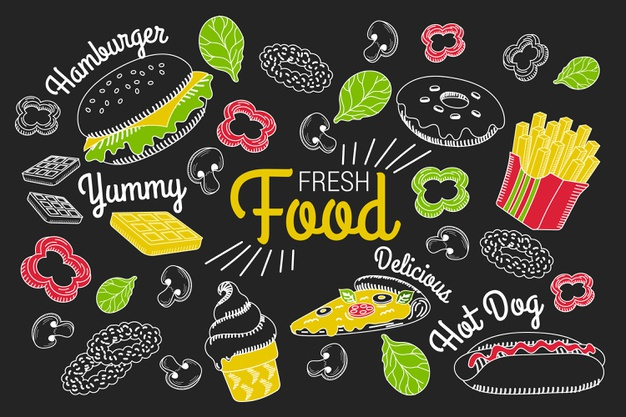



In [ ]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
def main():
  tb_codigos = config_default['DEFAULT'].get('tb_cod_produtos')
  tb_garcons = config_default['DEFAULT'].get('tb_garcons')
  codigos = pd.read_csv(tb_codigos)
  garcons = pd.read_csv(tb_garcons,sep='|')
  qtd_mesa = (config_default['DEFAULT'].getint('mesas'))
  #geradora de arquvos com os pedidos:
  for mesa in range(1,qtd_mesa + 1):
    numero_pedidos = random.randint(1,10)
    atendente = escolhe_opcao(garcons)[0]
    pedido = gera_pedido(codigos)
    pedido['atendente'] = atendente
    df_pedido = pd.DataFrame(pedido,index=[0])
    for i in range(numero_pedidos):
      pedido = gera_pedido(codigos)
      atendente = escolhe_opcao(garcons)[0]
      pedido['atendente'] = atendente
      df_pedido2 =  pd.DataFrame(pedido,index=[0])
      df_pedido = pd.concat([df_pedido,df_pedido2])
    df_pedido[['atendente','quantidade','produto']].to_csv('/content/mesa_' + str(mesa) + '.csv', sep='\t', index=False, header=False, encoding='utf-8')
    sleep(2)



In [ ]:
import pandas as pd
import random
from time import sleep
from my_functions import *
from configparser import ConfigParser


if __name__ == '__main__':
  config_default = ConfigParser()
  config_default.read('/content/config.ini')
  rodadas = (config_default['DEFAULT'].get('rodadas')) 
  
  for i in range(int(rodadas) + int(1)):
    main()
    sleep(5)
  with open('/content/fim.txt','w') as f:
    f.write('OK')
  


## Pedidos devidamente gerados

> Agora prossegue-se para a leitura dos dados e posterior geração da nota fiscal com todos os requisitos propostos:





In [ ]:
import pandas as pd

urlCodigos = "/content/codigos.csv"

codigosTb = pd.read_csv(urlCodigos)
display(codigosTb)

,COD_PRODUTO
0,401
1,5643
2,8104
3,3803
4,9416
...,...
63,4140
64,5018
65,8658
66,1665


In [ ]:
urlCardapio = "/content/cardapio.csv"

CardapioTb = pd.read_csv(urlCardapio)
display(CardapioTb)

,COD_PRODUTO|PRODUTO|PREÇO
0,401|Chateaux Pradeaux: Bandol|52.0
1,5643|Chateaux Pradeaux: Mouvedre|52.0
2,8104|Henry Varnay: Saumur|6.0
3,3803|Henry Varnay: Chenin Blanc|22.0
4,9416|Yves Lambert: Loire|25.0
...,...
63,4140|Hanger Steak|17.0
64,5018|Ribeye With Fries|2.0
65,8658|Sauteed Greens|3.0
66,1665|Potatoes|3.0


## Será necessário melhorar a visualização do cardápio:

In [ ]:
CardapioArrumado = CardapioTb["COD_PRODUTO|PRODUTO|PREÇO"].str.split("|", 2, expand = True)
display(CardapioArrumado)

,0,1,2
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


In [ ]:
CardapioArrumado.columns = ['CodigoProduto', 'NomeProduto', 'Preço']
display(CardapioArrumado)

,CodigoProduto,NomeProduto,Preço
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


## Agora temos o cardápio arrumado ↑

Agora refatorar e entender os pedidos:

In [ ]:
urlMesa1 = "/content/mesa_1.csv"

PedidosM1 = pd.read_csv(urlMesa1)
display(PedidosM1)

,9917293\t4\t1915
0,9917293\t1\t4084
1,9128120928\t1\t9039
2,8881098712\t3\t5496
3,9917293\t2\t6783
4,8881098712\t1\t2907


In [ ]:
display(CardapioArrumado[CardapioArrumado.CodigoProduto == '4084'])

,CodigoProduto,NomeProduto,Preço
51,4084,Vowel: Scotch,7.5


In [ ]:
urlGarcons = "/content/garcons.csv"

dadosGarcons = pd.read_csv(urlGarcons)
display(dadosGarcons)

,cod_garçom|nome_garçom
0,2371923719|O Campeão
1,9128120928|O Grande
2,8881098712|O Meu Amigo
3,0009917293|Meu Consagrado
4,0001018287|Minha Querida
5,2817671287|Moça


Refatoração das tbs garcons e pedidos:

In [ ]:
garconsArrumado = dadosGarcons["cod_garçom|nome_garçom"].str.split("|", 1, expand = True)
display(garconsArrumado)

,0,1
0,2371923719,O Campeão
1,9128120928,O Grande
2,8881098712,O Meu Amigo
3,0009917293,Meu Consagrado
4,0001018287,Minha Querida
5,2817671287,Moça


In [ ]:
garconsArrumado.columns = ['ID', 'Nick']
display(garconsArrumado)

,ID,Nick
0,2371923719,O Campeão
1,9128120928,O Grande
2,8881098712,O Meu Amigo
3,0009917293,Meu Consagrado
4,0001018287,Minha Querida
5,2817671287,Moça


## Agora temos a table dos garçons arrumada ↑

agora prosseguimos arrumando os pedidos mesa 1:

In [ ]:
PedidosM1Arrumado = PedidosM1["9917293\t4\t1915"].str.split("\t", 2, expand = True)
display(PedidosM1Arrumado)

,0,1,2
0,9917293,1,4084
1,9128120928,1,9039
2,8881098712,3,5496
3,9917293,2,6783
4,8881098712,1,2907


In [62]:
PedidosM1Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']
display(PedidosM1Arrumado)

,ID,Qtd,CodigoProduto
0,9917293,1,4084
1,9128120928,1,9039
2,8881098712,3,5496
3,9917293,2,6783
4,8881098712,1,2907


###O index da tabela de pedidos representa uma rodada, na 1º rodada o garçom meu consagrado fez o atendimento e a mesa1 consumiu 1 Vowel: Scotch no valor de 7.5 $ cada

> Nesse caso a nota fiscal contém valor total de 7.5 $, o produto, preço unitário... 

Agora a geração da Nota Fiscal:

In [59]:
display(CardapioArrumado)

,CodigoProduto,NomeProduto,Preço
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


In [67]:
NFMesa1 = pd.merge(PedidosM1Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")
display(NFMesa1)

,ID,Qtd,CodigoProduto,NomeProduto,Preço
0,9917293,1,4084,Vowel: Scotch,7.5
1,9128120928,1,9039,Green Salad,5.0
2,8881098712,3,5496,Goat Cheese Salad,6.5
3,9917293,2,6783,Foreau: Vouvray,52.0
4,8881098712,1,2907,Corpse Reviver: Triple Sec,7.5


podemos adicionar uma nova coluna com o valor total

#Dados Fiscais Mesa 1:

In [113]:
NFMesa1["Qtd"] = NFMesa1["Qtd"].astype(float)
NFMesa1["Preço"] = NFMesa1["Preço"].astype(float)
dadosNfMesa1 = NFMesa1.assign(Total = NFMesa1.Qtd * NFMesa1.Preço)
display(dadosNfMesa1)
SomadasRodadasM1 = dadosNfMesa1.Total.sum()
print("Soma das rodadas mesa 1 =", SomadasRodadasM1,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9917293,1.0,4084,Vowel: Scotch,1.0,1.0
1,9128120928,1.0,9039,Green Salad,1.0,1.0
2,8881098712,3.0,5496,Goat Cheese Salad,3.0,9.0
3,9917293,2.0,6783,Foreau: Vouvray,2.0,4.0
4,8881098712,1.0,2907,Corpse Reviver: Triple Sec,1.0,1.0


Soma das rodadas mesa 1 = 16.0 $


#Dados Fiscais Mesa 2:

In [114]:
urlMesa2 = "/content/mesa_2.csv"

PedidosM2 = pd.read_csv(urlMesa2)

PedidosM2Arrumado = PedidosM2["2371923719\t2\t8750"].str.split("\t", 2, expand = True)

PedidosM2Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa2 = pd.merge(PedidosM2Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa2["Qtd"] = NFMesa2["Qtd"].astype(float)
NFMesa2["Preço"] = NFMesa2["Preço"].astype(float)
dadosNFMesa2 = NFMesa2.assign(Total = NFMesa2.Qtd * NFMesa2.Preço)
display(dadosNFMesa2)

SomadasRodadasM2 = dadosNFMesa2.Total.sum()
print("Soma das rodadas mesa 2 =", SomadasRodadasM2,"$")


,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9128120928,2.0,9035,Jean Lallement: Champagne,80.0,160.0
1,8881098712,2.0,25,Champagne Cocktail: Sugar Cube,6.5,13.0
2,1018287,2.0,3620,Guinness,5.0,10.0
3,9917293,2.0,9551,Brandy Alexander: Brandy,7.0,14.0
4,1018287,2.0,8389,Burger,9.0,18.0
5,1018287,2.0,6783,Foreau: Vouvray,52.0,104.0
6,2817671287,2.0,8750,L'hereu: Xarel Lo,28.0,56.0
7,1018287,2.0,8104,Henry Varnay: Saumur,6.0,12.0


Soma das rodadas mesa 2 = 387.0 $


#Dados Fiscais Mesa 3:

In [118]:
urlMesa3 = "/content/mesa_3.csv"

PedidosM3 = pd.read_csv(urlMesa3)

PedidosM3Arrumado = PedidosM3["2371923719\t2\t9035"].str.split("\t", 2, expand = True)

PedidosM3Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa3 = pd.merge(PedidosM3Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa3["Qtd"] = NFMesa3["Qtd"].astype(float)
NFMesa3["Preço"] = NFMesa3["Preço"].astype(float)
dadosNFMesa3 = NFMesa3.assign(Total = NFMesa3.Qtd * NFMesa3.Preço)
display(dadosNFMesa3)

SomadasRodadasM3 = dadosNFMesa3.Total.sum()
print("Soma das rodadas mesa 3 =", SomadasRodadasM3,"$")


,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,1018287,3.0,9039,Green Salad,5.0,15.0
1,9128120928,3.0,9416,Yves Lambert: Loire,25.0,75.0
2,1018287,1.0,2489,Larmandier: Chardonnay,82.0,82.0
3,2817671287,3.0,5057,Vowel: Akavit,7.5,22.5
4,1018287,2.0,9035,Jean Lallement: Champagne,80.0,160.0
5,8881098712,2.0,1915,Ferrando: Piedmont,48.0,96.0
6,9128120928,2.0,3108,L'hereu: Macabeo,28.0,56.0
7,1018287,2.0,4367,Corpse Reviver: Lillet,7.5,15.0


Soma das rodadas mesa 3 = 521.5 $


#Dados Fiscais Mesa 4:

In [119]:
urlMesa4 = "/content/mesa_4.csv"

PedidosM4 = pd.read_csv(urlMesa4)

PedidosM4Arrumado = PedidosM4["1018287\t4\t3803"].str.split("\t", 2, expand = True)

PedidosM4Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa4 = pd.merge(PedidosM4Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa4["Qtd"] = NFMesa4["Qtd"].astype(float)
NFMesa4["Preço"] = NFMesa4["Preço"].astype(float)
dadosNFMesa4 = NFMesa4.assign(Total = NFMesa4.Qtd * NFMesa4.Preço)
display(dadosNFMesa4)

SomadasRodadasM4 = dadosNFMesa4.Total.sum()
print("Soma das rodadas mesa 4 =", SomadasRodadasM4,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9128120928,2.0,9734,Cheeseburger,9.5,19.0
1,2371923719,2.0,9842,Samuel Smith Pale Ale,5.0,10.0
2,2817671287,3.0,2378,Brandy Alexander: Cream,7.0,21.0
3,2371923719,1.0,2489,Larmandier: Chardonnay,82.0,82.0
4,9128120928,2.0,5057,Vowel: Akavit,7.5,15.0


Soma das rodadas mesa 4 = 147.0 $


#Dados Fiscais Mesa 5:

In [121]:
urlMesa5 = "/content/mesa_5.csv"

PedidosM5 = pd.read_csv(urlMesa5)
#display(PedidosM5)

PedidosM5Arrumado = PedidosM5["9128120928\t4\t6783"].str.split("\t", 2, expand = True)

PedidosM5Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa5 = pd.merge(PedidosM5Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa5["Qtd"] = NFMesa5["Qtd"].astype(float)
NFMesa5["Preço"] = NFMesa5["Preço"].astype(float)
dadosNFMesa5 = NFMesa5.assign(Total = NFMesa5.Qtd * NFMesa5.Preço)
display(dadosNFMesa5)

SomadasRodadasM5 = dadosNFMesa5.Total.sum()
print("Soma das rodadas mesa 5 =", SomadasRodadasM5,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9917293,3.0,8619,Jean Lallement: Pinot Noir,80.0,240.0
1,9917293,1.0,4084,Vowel: Scotch,7.5,7.5
2,9917293,1.0,4084,Vowel: Scotch,7.5,7.5
3,2817671287,2.0,1606,French 75: Brandy,7.0,14.0
4,9128120928,3.0,5073,Brundlmayer: Pinot Blanc,65.0,195.0
5,2817671287,4.0,7330,French Fries,3.5,14.0
6,2817671287,2.0,7330,French Fries,3.5,7.0
7,2371923719,4.0,9734,Cheeseburger,9.5,38.0
8,2371923719,4.0,7675,Rusty Nail: Drambuie,6.5,26.0
9,2817671287,4.0,1571,Soup,5.0,20.0


Soma das rodadas mesa 5 = 569.0 $


#Dados Fiscais Mesa 6:

In [123]:
urlMesa6 = "/content/mesa_6.csv"

PedidosM6 = pd.read_csv(urlMesa6)
#display(PedidosM6)

PedidosM6Arrumado = PedidosM6["9917293\t1\t8511"].str.split("\t", 2, expand = True)

PedidosM6Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa6 = pd.merge(PedidosM6Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa6["Qtd"] = NFMesa6["Qtd"].astype(float)
NFMesa6["Preço"] = NFMesa6["Preço"].astype(float)
dadosNFMesa6 = NFMesa6.assign(Total = NFMesa6.Qtd * NFMesa6.Preço)
display(dadosNFMesa6)

SomadasRodadasM6 = dadosNFMesa6.Total.sum()
print("Soma das rodadas mesa 6 =", SomadasRodadasM6,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,1018287,2.0,5018,Ribeye With Fries,2.0,4.0
1,1018287,2.0,5114,Foreau: Chenin Blanc,52.0,104.0


Soma das rodadas mesa 6 = 108.0 $


#Dados Fiscais Mesa 7:

In [126]:
urlMesa7 = "/content/mesa_7.csv"

PedidosM7 = pd.read_csv(urlMesa7)
#display(PedidosM7)

PedidosM7Arrumado = PedidosM7["9128120928\t1\t7675"].str.split("\t", 2, expand = True)

PedidosM7Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa7 = pd.merge(PedidosM7Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa7["Qtd"] = NFMesa7["Qtd"].astype(float)
NFMesa7["Preço"] = NFMesa7["Preço"].astype(float)
dadosNFMesa7 = NFMesa7.assign(Total = NFMesa7.Qtd * NFMesa7.Preço)
display(dadosNFMesa7)

SomadasRodadasM7 = dadosNFMesa7.Total.sum()
print("Soma das rodadas mesa 7 =", SomadasRodadasM7,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9917293,2.0,4084,Vowel: Scotch,7.5,15.0
1,9128120928,1.0,2633,Chimay,6.5,6.5
2,1018287,2.0,2633,Chimay,6.5,13.0
3,9917293,1.0,3108,L'hereu: Macabeo,28.0,28.0
4,1018287,3.0,9416,Yves Lambert: Loire,25.0,75.0
5,2371923719,2.0,2907,Corpse Reviver: Triple Sec,7.5,15.0
6,8881098712,1.0,3341,Heinekin,4.5,4.5


Soma das rodadas mesa 7 = 157.0 $


#Dados Fiscais Mesa 8:

In [128]:
urlMesa8 = "/content/mesa_8.csv"

PedidosM8 = pd.read_csv(urlMesa8)
#display(PedidosM8)

PedidosM8Arrumado = PedidosM8["2371923719\t2\t334"].str.split("\t", 2, expand = True)

PedidosM8Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa8 = pd.merge(PedidosM8Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa8["Qtd"] = NFMesa8["Qtd"].astype(float)
NFMesa8["Preço"] = NFMesa8["Preço"].astype(float)
dadosNFMesa8 = NFMesa8.assign(Total = NFMesa8.Qtd * NFMesa8.Preço)
display(dadosNFMesa8)

SomadasRodadasM8 = dadosNFMesa8.Total.sum()
print("Soma das rodadas mesa 8 =", SomadasRodadasM8,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2371923719,1.0,9035,Jean Lallement: Champagne,80.0,80.0


Soma das rodadas mesa 8 = 80.0 $


#Dados Fiscais Mesa 9:

In [131]:
urlMesa9 = "/content/mesa_9.csv"

PedidosM9 = pd.read_csv(urlMesa9)
#display(PedidosM9)

PedidosM9Arrumado = PedidosM9["1018287\t2\t7675"].str.split("\t", 2, expand = True)

PedidosM9Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa9 = pd.merge(PedidosM9Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa9["Qtd"] = NFMesa9["Qtd"].astype(float)
NFMesa9["Preço"] = NFMesa9["Preço"].astype(float)
dadosNFMesa9 = NFMesa9.assign(Total = NFMesa9.Qtd * NFMesa9.Preço)
display(dadosNFMesa9)

SomadasRodadasM9 = dadosNFMesa9.Total.sum()
print("Soma das rodadas mesa 9 =", SomadasRodadasM9,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2817671287,1.0,5114,Foreau: Chenin Blanc,52.0,52.0
1,2817671287,2.0,3344,Vowel: Oj,7.5,15.0
2,2817671287,1.0,6882,Brundlmayer: Austria,65.0,65.0
3,1018287,2.0,8619,Jean Lallement: Pinot Noir,80.0,160.0
4,9917293,2.0,5057,Vowel: Akavit,7.5,15.0
5,8881098712,1.0,4397,Vowel: Bitters,7.5,7.5
6,8881098712,4.0,8389,Burger,9.0,36.0
7,8881098712,3.0,25,Champagne Cocktail: Sugar Cube,6.5,19.5


Soma das rodadas mesa 9 = 370.0 $


#Dados Fiscais Mesa 10:

In [135]:
urlMesa10 = "/content/mesa_10.csv"

PedidosM10 = pd.read_csv(urlMesa10)
#display(PedidosM10)

PedidosM10Arrumado = PedidosM10["2371923719\t3\t6682"].str.split("\t", 2, expand = True)

PedidosM10Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa10 = pd.merge(PedidosM10Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa10["Qtd"] = NFMesa10["Qtd"].astype(float)
NFMesa10["Preço"] = NFMesa10["Preço"].astype(float)
dadosNFMesa10 = NFMesa10.assign(Total = NFMesa10.Qtd * NFMesa10.Preço)
display(dadosNFMesa10)

SomadasRodadasM10 = dadosNFMesa10.Total.sum()
print("Soma das rodadas mesa 10 =", SomadasRodadasM10,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2817671287,1.0,2633,Chimay,6.5,6.5
1,2817671287,3.0,6783,Foreau: Vouvray,52.0,156.0
2,1018287,2.0,9416,Yves Lambert: Loire,25.0,50.0
3,8881098712,1.0,5021,Duvel,6.5,6.5
4,2371923719,3.0,4032,Champagne Cocktail: Champagne,6.5,19.5
5,9128120928,1.0,9757,Bronx: Oj & Bitters,7.5,7.5
6,9917293,1.0,7675,Rusty Nail: Drambuie,6.5,6.5


Soma das rodadas mesa 10 = 252.5 $


#Dados Fiscais Mesa 11:

In [137]:
urlMesa11 = "/content/mesa_11.csv"

PedidosM11 = pd.read_csv(urlMesa11)
#display(PedidosM11)

PedidosM11Arrumado = PedidosM11["8881098712\t2\t2378"].str.split("\t", 2, expand = True)

PedidosM11Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa11 = pd.merge(PedidosM11Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa11["Qtd"] = NFMesa11["Qtd"].astype(float)
NFMesa11["Preço"] = NFMesa11["Preço"].astype(float)
dadosNFMesa11 = NFMesa11.assign(Total = NFMesa11.Qtd * NFMesa11.Preço)
display(dadosNFMesa11)

SomadasRodadasM11 = dadosNFMesa11.Total.sum()
print("Soma das rodadas mesa 11 =", SomadasRodadasM11,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9128120928,1.0,9039,Green Salad,5.0,5.0
1,2371923719,1.0,5057,Vowel: Akavit,7.5,7.5
2,2817671287,3.0,5643,Chateaux Pradeaux: Mouvedre,52.0,156.0
3,9917293,3.0,9416,Yves Lambert: Loire,25.0,75.0
4,2371923719,3.0,2633,Chimay,6.5,19.5
5,9917293,3.0,2633,Chimay,6.5,19.5


Soma das rodadas mesa 11 = 282.5 $


#Dados Fiscais Mesa 12:

In [141]:
urlMesa12 = "/content/mesa_12.csv"

PedidosM12 = pd.read_csv(urlMesa12)
#display(PedidosM12)

PedidosM12Arrumado = PedidosM12["1018287\t1\t3296"].str.split("\t", 2, expand = True)

PedidosM12Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa12 = pd.merge(PedidosM12Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa12["Qtd"] = NFMesa12["Qtd"].astype(float)
NFMesa12["Preço"] = NFMesa12["Preço"].astype(float)
dadosNFMesa12 = NFMesa12.assign(Total = NFMesa12.Qtd * NFMesa12.Preço)
display(dadosNFMesa12)

SomadasRodadasM12 = dadosNFMesa12.Total.sum()
print("Soma das rodadas mesa 12 =", SomadasRodadasM12,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9917293,1.0,4397,Vowel: Bitters,7.5,7.5
1,2371923719,1.0,5057,Vowel: Akavit,7.5,7.5
2,9917293,1.0,3803,Henry Varnay: Chenin Blanc,22.0,22.0
3,1018287,2.0,5643,Chateaux Pradeaux: Mouvedre,52.0,104.0
4,9128120928,3.0,2907,Corpse Reviver: Triple Sec,7.5,22.5
5,9917293,1.0,3296,Larmandier: Champagne,82.0,82.0
6,8881098712,3.0,1665,Potatoes,3.0,9.0
7,1018287,1.0,5114,Foreau: Chenin Blanc,52.0,52.0
8,9128120928,2.0,8619,Jean Lallement: Pinot Noir,80.0,160.0


Soma das rodadas mesa 12 = 466.5 $


#Dados Fiscais Mesa 13:

In [143]:
urlMesa13 = "/content/mesa_13.csv"

PedidosM13 = pd.read_csv(urlMesa13)
#display(PedidosM13)

PedidosM13Arrumado = PedidosM13["2817671287\t2\t3296"].str.split("\t", 2, expand = True)

PedidosM13Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa13 = pd.merge(PedidosM13Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa13["Qtd"] = NFMesa13["Qtd"].astype(float)
NFMesa13["Preço"] = NFMesa13["Preço"].astype(float)
dadosNFMesa13 = NFMesa13.assign(Total = NFMesa13.Qtd * NFMesa13.Preço)
display(dadosNFMesa13)

SomadasRodadasM13 = dadosNFMesa13.Total.sum()
print("Soma das rodadas mesa 13 =", SomadasRodadasM13,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2371923719,1.0,8511,Jean Lallement: Chardonnay,80.0,80.0
1,9917293,2.0,9842,Samuel Smith Pale Ale,5.0,10.0
2,2817671287,3.0,5405,Yves Lambert: Chenin Blanc,25.0,75.0
3,8881098712,3.0,3620,Guinness,5.0,15.0
4,1018287,2.0,1277,Rusty Nail: Scotch,6.5,13.0
5,9128120928,3.0,3169,Vowel: Sweet Vermouth,7.5,22.5
6,9128120928,1.0,9039,Green Salad,5.0,5.0
7,2371923719,1.0,2489,Larmandier: Chardonnay,82.0,82.0
8,9128120928,1.0,6688,Stove Pipe Porter,5.0,5.0
9,9128120928,1.0,8276,L'hereu: Cava,28.0,28.0


Soma das rodadas mesa 13 = 335.5 $


#Dados Fiscais Mesa 14:

In [145]:
urlMesa14 = "/content/mesa_14.csv"

PedidosM14 = pd.read_csv(urlMesa14)
#display(PedidosM14)

PedidosM14Arrumado = PedidosM14["8881098712\t2\t7675"].str.split("\t", 2, expand = True)

PedidosM14Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa14 = pd.merge(PedidosM14Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa14["Qtd"] = NFMesa14["Qtd"].astype(float)
NFMesa14["Preço"] = NFMesa14["Preço"].astype(float)
dadosNFMesa14 = NFMesa14.assign(Total = NFMesa14.Qtd * NFMesa14.Preço)
display(dadosNFMesa14)

SomadasRodadasM14 = dadosNFMesa14.Total.sum()
print("Soma das rodadas mesa 14 =", SomadasRodadasM14,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,8881098712,1.0,6688,Stove Pipe Porter,5.0,5.0
1,9917293,1.0,6783,Foreau: Vouvray,52.0,52.0
2,1018287,3.0,831,Pierre Gimonnet: Chardonnay,75.0,225.0
3,2371923719,3.0,5863,Mussels With Fries,12.5,37.5


Soma das rodadas mesa 14 = 319.5 $


#Dados Fiscais Mesa 15:

In [147]:
urlMesa15 = "/content/mesa_15.csv"

PedidosM15 = pd.read_csv(urlMesa15)
#display(PedidosM15)

PedidosM15Arrumado = PedidosM15["9128120928\t4\t1246"].str.split("\t", 2, expand = True)

PedidosM15Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa15 = pd.merge(PedidosM15Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa15["Qtd"] = NFMesa15["Qtd"].astype(float)
NFMesa15["Preço"] = NFMesa15["Preço"].astype(float)
dadosNFMesa15 = NFMesa15.assign(Total = NFMesa15.Qtd * NFMesa15.Preço)
display(dadosNFMesa15)

SomadasRodadasM15 = dadosNFMesa15.Total.sum()
print("Soma das rodadas mesa 15 =", SomadasRodadasM15,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,9128120928,3.0,9757,Bronx: Oj & Bitters,7.5,22.5
1,9917293,1.0,1915,Ferrando: Piedmont,48.0,48.0


Soma das rodadas mesa 15 = 70.5 $


#Dados Fiscais Mesa 16:

In [149]:
urlMesa16 = "/content/mesa_16.csv"

PedidosM16 = pd.read_csv(urlMesa16)
#display(PedidosM16)

PedidosM16Arrumado = PedidosM16["2817671287\t2\t1246"].str.split("\t", 2, expand = True)

PedidosM16Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa16 = pd.merge(PedidosM16Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa16["Qtd"] = NFMesa16["Qtd"].astype(float)
NFMesa16["Preço"] = NFMesa16["Preço"].astype(float)
dadosNFMesa16 = NFMesa16.assign(Total = NFMesa16.Qtd * NFMesa16.Preço)
display(dadosNFMesa16)

SomadasRodadasM16 = dadosNFMesa16.Total.sum()
print("Soma das rodadas mesa 16 =", SomadasRodadasM16,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,8881098712,3.0,9842,Samuel Smith Pale Ale,5.0,15.0
1,8881098712,4.0,5643,Chateaux Pradeaux: Mouvedre,52.0,208.0
2,8881098712,3.0,3803,Henry Varnay: Chenin Blanc,22.0,66.0


Soma das rodadas mesa 16 = 289.0 $


#Dados Fiscais Mesa 17:

In [151]:
urlMesa17 = "/content/mesa_17.csv"

PedidosM17 = pd.read_csv(urlMesa17)
#display(PedidosM17)

PedidosM17Arrumado = PedidosM17["9917293\t4\t9888"].str.split("\t", 2, expand = True)

PedidosM17Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa17 = pd.merge(PedidosM17Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa17["Qtd"] = NFMesa17["Qtd"].astype(float)
NFMesa17["Preço"] = NFMesa17["Preço"].astype(float)
dadosNFMesa17 = NFMesa17.assign(Total = NFMesa17.Qtd * NFMesa17.Preço)
display(dadosNFMesa17)

SomadasRodadasM17 = dadosNFMesa17.Total.sum()
print("Soma das rodadas mesa 17 =", SomadasRodadasM17,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2371923719,2.0,2633,Chimay,6.5,13.0
1,1018287,1.0,4084,Vowel: Scotch,7.5,7.5
2,8881098712,3.0,25,Champagne Cocktail: Sugar Cube,6.5,19.5
3,1018287,1.0,7330,French Fries,3.5,3.5
4,8881098712,1.0,5021,Duvel,6.5,6.5
5,9128120928,4.0,3571,Stella Artois,5.0,20.0
6,9917293,2.0,8511,Jean Lallement: Chardonnay,80.0,160.0
7,8881098712,2.0,831,Pierre Gimonnet: Chardonnay,75.0,150.0


Soma das rodadas mesa 17 = 380.0 $


#Dados Fiscais Mesa 18:

In [154]:
urlMesa18 = "/content/mesa_18.csv"

PedidosM18 = pd.read_csv(urlMesa18)
#display(PedidosM18)

PedidosM18Arrumado = PedidosM18["2817671287\t2\t3169"].str.split("\t", 2, expand = True)

PedidosM18Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa18 = pd.merge(PedidosM18Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa18["Qtd"] = NFMesa18["Qtd"].astype(float)
NFMesa18["Preço"] = NFMesa18["Preço"].astype(float)
dadosNFMesa18 = NFMesa18.assign(Total = NFMesa18.Qtd * NFMesa18.Preço)
display(dadosNFMesa18)

SomadasRodadasM18 = dadosNFMesa18.Total.sum()
print("Soma das rodadas mesa 18 =", SomadasRodadasM18,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,2371923719,3.0,5114,Foreau: Chenin Blanc,52.0,156.0
1,8881098712,2.0,831,Pierre Gimonnet: Chardonnay,75.0,150.0
2,8881098712,2.0,6723,Corpse Reviver: Pastis,7.5,15.0
3,8881098712,3.0,8619,Jean Lallement: Pinot Noir,80.0,240.0


Soma das rodadas mesa 18 = 561.0 $


#Dados Fiscais Mesa 19:

In [156]:
urlMesa19 = "/content/mesa_19.csv"

PedidosM19 = pd.read_csv(urlMesa19)
#display(PedidosM19)

PedidosM19Arrumado = PedidosM19["9917293\t2\t4032"].str.split("\t", 2, expand = True)

PedidosM19Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa19 = pd.merge(PedidosM19Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa19["Qtd"] = NFMesa19["Qtd"].astype(float)
NFMesa19["Preço"] = NFMesa19["Preço"].astype(float)
dadosNFMesa19 = NFMesa19.assign(Total = NFMesa19.Qtd * NFMesa19.Preço)
display(dadosNFMesa19)

SomadasRodadasM19 = dadosNFMesa19.Total.sum()
print("Soma das rodadas mesa 19 =", SomadasRodadasM19,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,1018287,2.0,1277,Rusty Nail: Scotch,6.5,13.0
1,2371923719,1.0,8511,Jean Lallement: Chardonnay,80.0,80.0
2,2817671287,3.0,3571,Stella Artois,5.0,15.0
3,2817671287,3.0,3064,Brundlmayer: Pinot Noir,65.0,195.0
4,9917293,2.0,5018,Ribeye With Fries,2.0,4.0
5,2817671287,2.0,3620,Guinness,5.0,10.0
6,2817671287,1.0,2378,Brandy Alexander: Cream,7.0,7.0
7,8881098712,1.0,5405,Yves Lambert: Chenin Blanc,25.0,25.0
8,9917293,1.0,3344,Vowel: Oj,7.5,7.5


Soma das rodadas mesa 19 = 356.5 $


#Dados Fiscais Mesa 20:

In [158]:
urlMesa20 = "/content/mesa_20.csv"

PedidosM20 = pd.read_csv(urlMesa20)
#display(PedidosM20)

PedidosM20Arrumado = PedidosM20["8881098712\t3\t6882"].str.split("\t", 2, expand = True)

PedidosM20Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa20 = pd.merge(PedidosM20Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa20["Qtd"] = NFMesa20["Qtd"].astype(float)
NFMesa20["Preço"] = NFMesa20["Preço"].astype(float)
dadosNFMesa20 = NFMesa20.assign(Total = NFMesa20.Qtd * NFMesa20.Preço)
display(dadosNFMesa20)

SomadasRodadasM20 = dadosNFMesa20.Total.sum()
print("Soma das rodadas mesa 20 =", SomadasRodadasM20,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total
0,8881098712,2.0,5114,Foreau: Chenin Blanc,52.0,104.0
1,9128120928,1.0,9757,Bronx: Oj & Bitters,7.5,7.5
2,9917293,2.0,9551,Brandy Alexander: Brandy,7.0,14.0
3,2817671287,1.0,6688,Stove Pipe Porter,5.0,5.0
4,9917293,2.0,2907,Corpse Reviver: Triple Sec,7.5,15.0
5,9128120928,3.0,1277,Rusty Nail: Scotch,6.5,19.5
6,9917293,4.0,9039,Green Salad,5.0,20.0


Soma das rodadas mesa 20 = 185.0 $


## *Agora continuaremos com o fechamento do dia e coleta de todos os dados:* 

In [166]:
x = SomadasRodadasM1 + SomadasRodadasM2 + SomadasRodadasM3 + SomadasRodadasM4 + SomadasRodadasM5 + SomadasRodadasM6 + SomadasRodadasM7 + SomadasRodadasM8 + SomadasRodadasM9 + SomadasRodadasM9 + SomadasRodadasM10 + SomadasRodadasM11 + SomadasRodadasM12 + SomadasRodadasM13 + SomadasRodadasM14 + SomadasRodadasM15 + SomadasRodadasM16 + SomadasRodadasM17 + SomadasRodadasM18 + SomadasRodadasM19 + SomadasRodadasM20
print("Fechamento do dia 1 = ", x, "$")

Fechamento do dia 1 =  6224.0 $


# Fechamento do dia 1 =  6224.0 $